# Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1.

# Importing Data

In [9]:
path = r'C:\Users\drbar\Documents\Career Foundry\Projects\04 - 25 Instacart Basket Analysis'

In [10]:
df49 = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','df49_merge.pkl'))

In [13]:
# Checking the dataframe
df49.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_regularity,first_name,last_name,gender,state,age,date_joined,dependents,fam_status,income
0,196,Soda,77,7,9.0,431534,1,5,4,15,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,196,Soda,77,7,9.0,473747,1,3,3,12,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,196,Soda,77,7,9.0,550135,1,7,1,9,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,196,Soda,77,7,9.0,2254736,1,4,4,7,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,196,Soda,77,7,9.0,2295261,1,9,1,16,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 2.

In [15]:
# Columns containing PII are removed before moving forward with analysis
df410 = df49.drop(columns = ['first_name','last_name'])

In [16]:
# Confirming the removal of PII
df410.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range_loc', 'busiest_days',
       'hourly_order_flag', 'max_order', 'loyalty_flag',
       'average_user_item_price', 'spending_habit',
       'average_days_since_prior_order', 'order_regularity', 'gender', 'state',
       'age', 'date_joined', 'dependents', 'fam_status', 'income'],
      dtype='object')

In [17]:
df410.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,spending_habit,average_days_since_prior_order,order_regularity,gender,state,age,date_joined,dependents,fam_status,income
0,196,Soda,77,7,9.0,431534,1,5,4,15,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,196,Soda,77,7,9.0,473747,1,3,3,12,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,196,Soda,77,7,9.0,550135,1,7,1,9,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,196,Soda,77,7,9.0,2254736,1,4,4,7,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,196,Soda,77,7,9.0,2295261,1,9,1,16,...,Low spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# 3a.

In [19]:
# Using a for loop to create and populate a 'region' column, sorting the 'state' column
region = []

for value in df410["state"]:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut', 'New York','Pennsylvania','New Jersey']:
        region.append("Region 1")
    elif value in ['Wisconsin', 'Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append("Region 2")
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida',
                'Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append("Region 3")
    elif value in ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']:
        region.append("Region 4")
    else:
        region.append("Unknown Region")

In [20]:
# Creating an object of the 'region' column
df410['region'] = region

In [21]:
# Testing to make sure every state made it into a region
df410['region'].value_counts(dropna = False)

region
Region 3    10791885
Region 4     8292913
Region 2     7597325
Region 1     5722736
Name: count, dtype: int64

In [22]:
# Used to find which states end up in 'Unkown Region'
unknown_states = df410[df410['region'] == 'Unknown Region']['state'].unique()

In [23]:
# Returns states ending up in 'Unknown Region'
print(unknown_states)

[]


## 3b.

In [25]:
# Creating a groupby obeject to compare each regions spending habit.
spending_counts = df410.groupby('region')['spending_habit'].value_counts()

In [26]:
# Region 3 holds the highest count customers total, holding the lead for both 'low spender' and 'high spender' categories.
print(spending_counts)

region    spending_habit
Region 1  Low spender        5614511
          High spender        108225
Region 2  Low spender        7441350
          High spender        155975
Region 3  Low spender       10582194
          High spender        209691
Region 4  Low spender        8132559
          High spender        160354
Name: count, dtype: int64


# 4.

In [28]:
# Checking the data set to assess how I will make a flag for user_id with less than 5 orders.
# I have decided to make a flag for count of 'order_id' per 'user_id'
df410.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,average_days_since_prior_order,order_regularity,gender,state,age,date_joined,dependents,fam_status,income,region
0,196,Soda,77,7,9.0,431534,1,5,4,15,...,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3
1,196,Soda,77,7,9.0,473747,1,3,3,12,...,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3
2,196,Soda,77,7,9.0,550135,1,7,1,9,...,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3
3,196,Soda,77,7,9.0,2254736,1,4,4,7,...,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3
4,196,Soda,77,7,9.0,2295261,1,9,1,16,...,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3


In [29]:
# Grouping 'user_id' by 'order_id' in a new object.
user_order_df = df410.groupby('user_id')['order_id'].nunique().reset_index(name='order_count')

In [30]:
# Checking results
user_order_df.head()

,user_id,order_count
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4


In [31]:
# Creating a flag for customers with less than 5 orders
user_order_df['low_order_flag'] = user_order_df['order_count'] < 5

In [32]:
# Merging the flag with the main dataframe
df410 = df410.merge(user_order_df[['user_id','low_order_flag']], on = 'user_id', how='left')

In [33]:
# Checking results
df410.head(10)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,order_regularity,gender,state,age,date_joined,dependents,fam_status,income,region,low_order_flag
0,196,Soda,77,7,9.0,431534,1,5,4,15,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3,False
1,196,Soda,77,7,9.0,473747,1,3,3,12,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3,False
2,196,Soda,77,7,9.0,550135,1,7,1,9,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3,False
3,196,Soda,77,7,9.0,2254736,1,4,4,7,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3,False
4,196,Soda,77,7,9.0,2295261,1,9,1,16,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3,False
5,196,Soda,77,7,9.0,2398795,1,2,3,7,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3,False
6,196,Soda,77,7,9.0,2539329,1,1,2,8,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3,False
7,196,Soda,77,7,9.0,2550362,1,10,4,8,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3,False
8,196,Soda,77,7,9.0,3108588,1,8,1,14,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3,False
9,196,Soda,77,7,9.0,3367565,1,6,2,7,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,Region 3,False


In [34]:
# Checking the results
df410['low_order_flag'].value_counts()

low_order_flag
False    30964518
True      1440341
Name: count, dtype: int64

In [35]:
# Removing row's flagged with fewer than 5 orders
df410 = df410[df410['low_order_flag'] == False]

In [36]:
# Checking the results
df410['low_order_flag'].value_counts()

low_order_flag
False    30964518
Name: count, dtype: int64

In [37]:
# Removing the 'low_order_flag' from the dataframe
df410 = df410.drop(columns = ['low_order_flag'])

In [38]:
# Checking results 
df410.tail(10)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,average_days_since_prior_order,order_regularity,gender,state,age,date_joined,dependents,fam_status,income,region
32404849,41213,French Loaf,112,3,4.8,3154581,206209,1,3,11,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Region 2
32404850,41665,Organic Mexican Blend Finely Shredded Cheese,21,16,4.7,688306,206209,4,1,10,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Region 2
32404851,43961,Organic Peeled Whole Baby Carrots,123,4,3.8,626363,206209,12,1,12,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Region 2
32404852,43961,Organic Peeled Whole Baby Carrots,123,4,3.8,688306,206209,4,1,10,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Region 2
32404853,43961,Organic Peeled Whole Baby Carrots,123,4,3.8,2129269,206209,8,3,17,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Region 2
32404854,44325,Elbow Macaroni Pasta,131,9,1.8,550836,206209,7,2,13,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Region 2
32404855,48370,Sensitive Toilet Paper,54,17,7.4,1854736,206209,11,4,10,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Region 2
32404856,48697,Canola Oil,19,13,8.3,550836,206209,7,2,13,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Region 2
32404857,48742,Quick 1 Minute Whole Grain Oats,130,14,5.9,550836,206209,7,2,13,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Region 2
32404858,48742,Quick 1 Minute Whole Grain Oats,130,14,5.9,626363,206209,12,1,12,...,20.275862,Non-frequent customer,Female,Iowa,74,9/14/2019,3,married,137969,Region 2


##  5.

In [40]:
# Creating profiles based on shopper's habits and qualities

 I originally wrote this code, but it took very long to execute so I researched and found a more efficient approach
 
shopper_profile = []

for index, row in df410.iterrows():
    dept = row['department_id']
    hour = row['order_hour_of_day']
    day = row['orders_day_of_week']
    age = row['age']
    income = row['income']
    dependents = row['dependents']

    if dept in [18, 16, 14, 4] and hour < 14 and dependents >= 1 and age < 25:
        shopper_profile.append('Young Parent')

    elif dept in [19, 5, 1] and dependents == 0 and age < 65:
        shopper_profile.append('Single Adult')

    elif dept in [10, 15, 12, 16] and dependents >= 3:
        shopper_profile.append('Bulk Buyer / Large Household')

    elif dept == 8:
        shopper_profile.append('Pet Owner')

    elif dept in [15, 1, 19] and income < 40000:
        shopper_profile.append('Budget-Conscious Shopper')

    else:
        shopper_profile.append('Uncategorized')

In [42]:
# Create a default profile
df410['shopper_profile'] = 'Uncategorized'

# Conditions
young_parent_mask = (
    df410['department_id'].isin([18, 16, 14, 4]) &
    (df410['age'] < 25) &
    (df410['income'] > 0) &
    (df410['dependents'] >= 1))

single_adult_mask = (
    df410['department_id'].isin([19, 5, 1]) &
    (df410['dependents'] == 0) &
    (df410['age'] < 65))

bulk_buyer_mask = (
    df410['department_id'].isin([10, 15, 12, 16]) &
    (df410['dependents'] >= 3))

pet_owner_mask = (df410['department_id'] == 8)

convenience_mask = df410['department_id'].isin([3, 7, 19]) & (df410['order_hour_of_day'] >= 18)

budget_mask = (
    df410['department_id'].isin([15, 1, 19]) &
    (df410['income'] < 40000))

# Apply profiles in order of priority
df410.loc[young_parent_mask, 'shopper_profile'] = 'Young Parent'
df410.loc[single_adult_mask, 'shopper_profile'] = 'Single Adult'
df410.loc[bulk_buyer_mask, 'shopper_profile'] = 'Bulk Buyer / Large Household'
df410.loc[pet_owner_mask, 'shopper_profile'] = 'Pet Owner'
df410.loc[convenience_mask, 'shopper_profile'] = 'Convenience Shopper'
df410.loc[budget_mask, 'shopper_profile'] = 'Budget-Conscious Shopper'

In [43]:
# Checking the 'shopper_profile' population
df410['shopper_profile'].value_counts(dropna = False)

shopper_profile
Uncategorized                   25773854
Bulk Buyer / Large Household     1722765
Young Parent                     1136018
Convenience Shopper              1041841
Single Adult                      767515
Budget-Conscious Shopper          429465
Pet Owner                          93060
Name: count, dtype: int64

# 6.

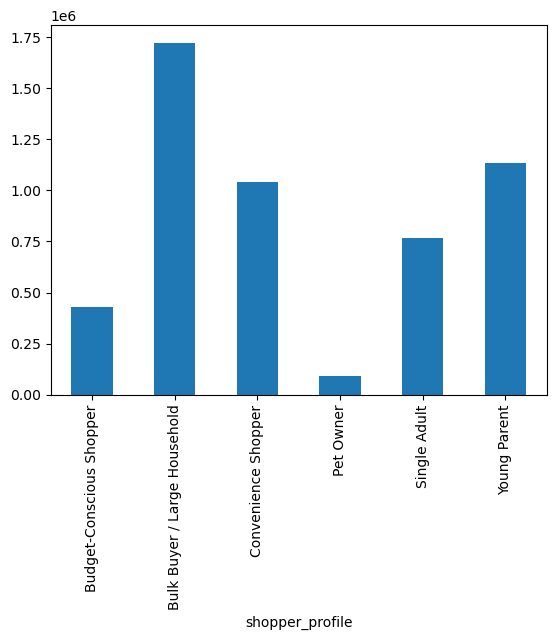

In [45]:
# Creating a bar graph to show distribution of 'shopper_profile'
bar_shopper_profile = df410['shopper_profile'].value_counts().drop(['Uncategorized'], errors = 'ignore').sort_index().plot.bar()

In [98]:
df410.shape

(30964518, 32)

# 7.

In [48]:
# Aggregating statistical analysis on the 'shopper_profile' column against the 'prices' column
df410.groupby('shopper_profile')[['prices']].agg(['min','mean','max'])

prices                
                                min      mean   max
shopper_profile                                    
Budget-Conscious Shopper        1.0  5.052242  15.0
Bulk Buyer / Large Household    1.0  9.018884  25.0
Convenience Shopper             1.0  6.312401  15.0
Pet Owner                       1.0  7.887489  15.0
Single Adult                    1.0  6.090864  15.0
Uncategorized                   1.0  7.851809  25.0
Young Parent                    1.0  8.071780  15.0

In [49]:
# Aggregating statistical analysis on the 'shopper_profile' column against the 'order_number' column
df410.groupby('shopper_profile')[['order_number']].agg(['min','mean','max'])

order_number               
                                      min       mean max
shopper_profile                                         
Budget-Conscious Shopper                1  16.482831  99
Bulk Buyer / Large Household            1  17.970914  99
Convenience Shopper                     1  16.744851  99
Pet Owner                               1  15.995927  99
Single Adult                            1  17.275086  99
Uncategorized                           1  17.878505  99
Young Parent                            1  18.658908  99

In [50]:
# Aggregating statistical analysis on the 'shopper_profile' column against the 'order_hour_of_day' column
df410.groupby('shopper_profile')[['order_hour_of_day']].agg(['min','mean','max'])

order_hour_of_day               
                                           min       mean max
shopper_profile                                              
Budget-Conscious Shopper                     0  13.160341  23
Bulk Buyer / Large Household                 0  13.386350  23
Convenience Shopper                         18  19.713660  23
Pet Owner                                    0  13.571524  23
Single Adult                                 0  12.903934  23
Uncategorized                                0  13.179341  23
Young Parent                                 0  13.347702  23

In [51]:
# Aggregating statistical analysis on the 'shopper_profile' column against the 'orders_day_of_week' column
df410.groupby('shopper_profile')[['orders_day_of_week']].agg(['min','mean','max'])

orders_day_of_week              
                                            min      mean max
shopper_profile                                              
Budget-Conscious Shopper                      0  2.720480   6
Bulk Buyer / Large Household                  0  2.727331   6
Convenience Shopper                           0  2.852428   6
Pet Owner                                     0  2.934730   6
Single Adult                                  0  2.778351   6
Uncategorized                                 0  2.737678   6
Young Parent                                  0  2.712306   6

In [52]:
# Aggregating statistical analysis on the 'shopper_profile' column against the 'income' column
df410.groupby('shopper_profile')[['income']].agg(['min','mean','max'])

income                       
                                min           mean     max
shopper_profile                                           
Budget-Conscious Shopper      25903   34243.713576   39999
Bulk Buyer / Large Household  25941  101487.820773  591089
Convenience Shopper           25903  100298.320630  593901
Pet Owner                     26256  103825.088577  591089
Single Adult                  26170   96389.427619  584097
Uncategorized                 25903  101956.092108  593901
Young Parent                  25937   71239.126414  396364

In [53]:
# Aggregating statistical analysis on the 'shopper_profile' column against the 'dependents' column
df410.groupby('shopper_profile')[['dependents']].agg(['min','mean','max'])

dependents              
                                    min      mean max
shopper_profile                                      
Budget-Conscious Shopper              0  1.516154   3
Bulk Buyer / Large Household          3  3.000000   3
Convenience Shopper                   0  1.499608   3
Pet Owner                             0  1.485525   3
Single Adult                          0  0.000000   0
Uncategorized                         0  1.430313   3
Young Parent                          1  1.864800   3

# 8.

In [55]:
# Creating an object for 'region' grouped by 'shopper_profile
profile_region = df410.groupby(['region','shopper_profile']).size().unstack().fillna(0)

In [56]:
# Removing 'Uncategorized'
profile_region = profile_region.drop(columns = 'Uncategorized')

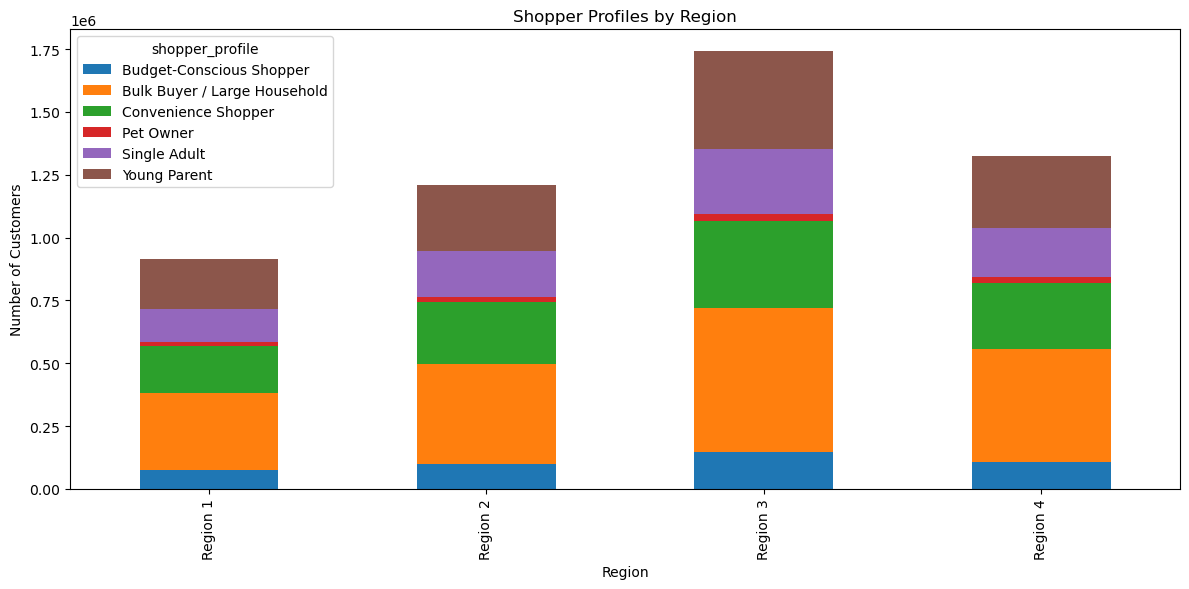

In [57]:
# Creating a bar graph for 'shopper_profile' by 'region'
profile_region.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Shopper Profiles by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
plt.tight_layout()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_shopper_profiles_by_region.png'))

In [58]:
# Creating an object for 'department_id' by 'shopper_profile'
profile_dept = df410.groupby(['department_id', 'shopper_profile']).size().unstack().fillna(0)

In [59]:
# Dropping 'Uncategorized'
profile_dept = profile_dept.drop(columns='Uncategorized', errors='ignore')

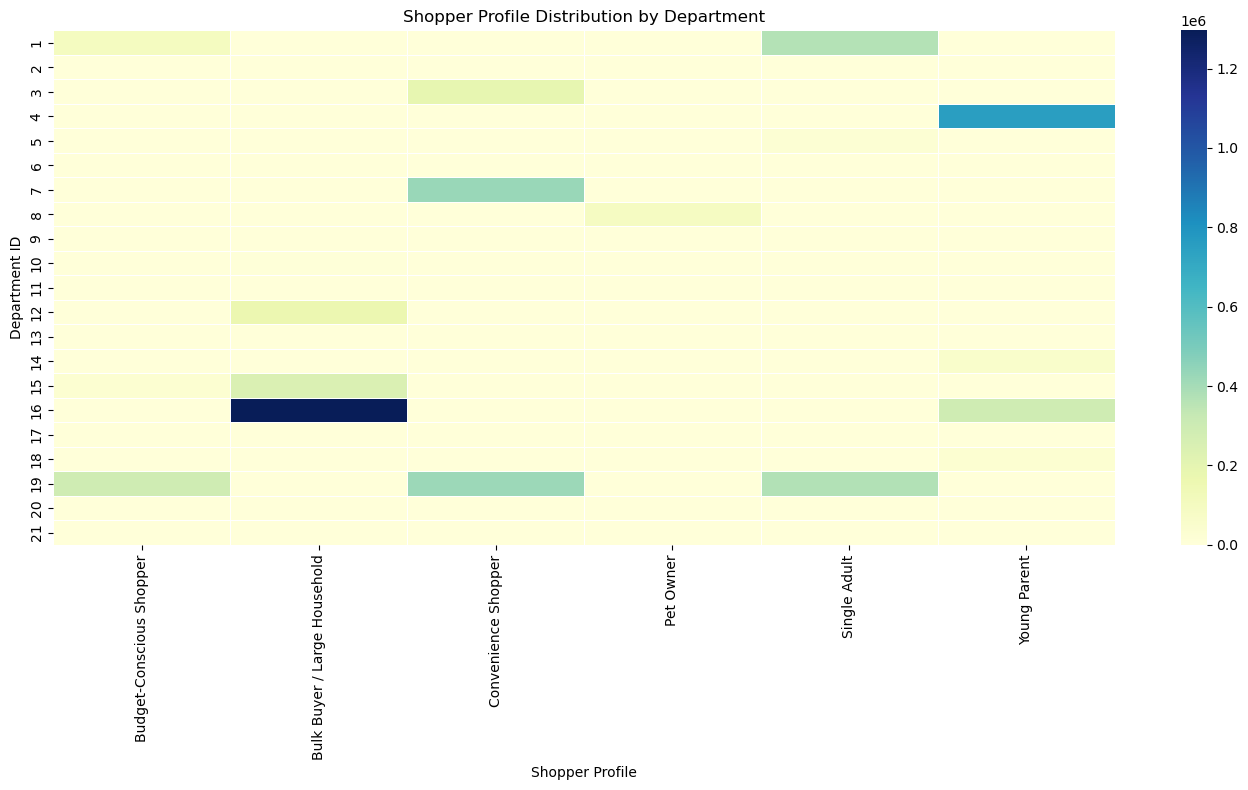

In [60]:
# Ploting 'department_id' by 'shopper_profile' as heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(profile_dept, cmap='YlGnBu', linewidths=0.5)
plt.title('Shopper Profile Distribution by Department')
plt.xlabel('Shopper Profile')
plt.ylabel('Department ID')
plt.tight_layout()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','heat_shopper_profile_by_department.png'))

Aggregated statistics revealed meaningful distinctions between customer profiles. Bulk Buyers / Large Households consistently exhibited the highest average spend per product ($9.02) and the highest income levels, suggesting a strong correlation between household size and spending capacity. Young Parents also showed high order frequency and moderate spending, indicating strong platform engagement among this group. In contrast, Budget-Conscious Shoppers and Single Adults displayed lower average prices and income, aligning with cost-sensitive behavior.

Regionally, Region 3 hosted the largest population of shoppers overall, particularly among Young Parents and Single Adults, implying a more urban or younger demographic. The heatmap comparison with departments further emphasized distinct buying behaviors. Bulk Buyers dominated categories like snacks and beverages, while Convenience Shoppers frequently purchased from deli and prepared food sections. These findings highlight the potential for region- and profile-targeted marketing strategies to optimize customer engagement and product placement.